# Data pre-processing

## Imports

In [351]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from functions import sig, alter_sig, sigfit, alter_sigfit
pd.options.mode.chained_assignment = None # Stop seeing warnings

In [352]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from functions import sig, alter_sig, sigfit, alter_sigfit
pd.options.mode.chained_assignment = None # Stop seeing warnings

## Load data

### Load demographic and scales data

In [353]:
# Control group
sheet_url_control = " https://docs.google.com/spreadsheets/d/1ie0ove_ET37l_vswQY3h8bMFgs5UrHCuJxVwbYA1jpo/edit#gid=1715468447"
url_demographic_control = sheet_url_control.replace("/edit#gid=", "/export?format=csv&gid=")
data_demographic_control = pd.read_csv(url_demographic_control)
data_demographic_control["Group"] = "Control"
data_demographic_control.head(5)

,Marca temporal,Código de participante,He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:,Sexo,Edad (en años),Nivel educativo,Ocupación,¿Eres beneficiario de alguna beca académica? ¿Cuál?,"¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.)","¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).",...,3. Me resulta fácil hacer más de una cosa a la vez.,"4. Si hay una interrupción, puedo volver a concentrarme en lo que estaba haciendo muy rápido.","5. Me resulta fácil ""leer entre líneas"" cuando alguien me está hablando.",6. Sé cómo saber si alguien que me escucha se está aburriendo.,"7. Cuando estoy leyendo una historia, me resulta difícil descifrar las intenciones de los personajes.","8. Me gusta recabar información sobre categorías de cosas (por ejemplo: tipos de automóviles, tipos de aves, tipos de trenes, tipos de plantas, etc.)",9. Me resulta fácil saber lo que alguien está pensando o sintiendo simplemente mirando su rostro.,10. Me resulta difícil comprender las intenciones de las personas.,"Por favor, coloca aquí el puntaje de CRA Estandarizado:",Group
0,26/04/2024 14:05:00,GC001,Sí,Femenino,18,Secundaria completa,Estudiante,BECA18,No,No,...,2.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,"48,52",Control
1,26/04/2024 15:14:14,GC002,Sí,Femenino,19,Secundaria completa,Estudiante,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
2,29/04/2024 11:23:38,GC003,Sí,Masculino,19,Secundaria completa,Estudiante,No,No,No,...,4.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,"56,83",Control
3,30/04/2024 13:29:25,GC004,Sí,Femenino,19,Universitario incompleto,Estudiante,RPU-Movilidad Estudiantil,No,No,...,2.0,2.0,3.0,4.0,2.0,3.0,4.0,2.0,NaN,Control
4,2/05/2024 13:02:02,GC005,Sí,Masculino,18,Universitario incompleto,Universitario,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Control


In [354]:
# Experimental
sheet_url_exp = "https://docs.google.com/spreadsheets/d/1H9DApYyqdZ0iVAvFKBodHrH654K0NwKzldf5xz5m2tc/edit#gid=1885121359"
url_demographic_exp = sheet_url_exp.replace("/edit#gid=", "/export?format=csv&gid=")
data_demographic_exp = pd.read_csv(url_demographic_exp)
data_demographic_exp["Group"] = "HA"
data_demographic_exp.head(5)

,Marca temporal,Código de participante,He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:,Sexo,Edad (en años),Nivel educativo,Ocupación,¿Eres beneficiario de alguna beca académica? ¿Cuál?,"¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).",¿Presentas problemas de visión sin corregir?,...,3. Me resulta fácil hacer más de una cosa a la vez.,"4. Si hay una interrupción, puedo volver a concentrarme en lo que estaba haciendo muy rápido.","5. Me resulta fácil ""leer entre líneas"" cuando alguien me está hablando.",6. Sé cómo saber si alguien que me escucha se está aburriendo.,"7. Cuando estoy leyendo una historia, me resulta difícil descifrar las intenciones de los personajes.","8. Me gusta recabar información sobre categorías de cosas (por ejemplo: tipos de automóviles, tipos de aves, tipos de trenes, tipos de plantas, etc.)",9. Me resulta fácil saber lo que alguien está pensando o sintiendo simplemente mirando su rostro.,10. Me resulta difícil comprender las intenciones de las personas.,"¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.)",Group
0,30/1/2024 10:34:23,P01,NaN,Femenino,23,Universitario incompleto,Universitaria,NaN,No,No,...,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,No,HA
1,30/1/2024 12:30:34,P02,NaN,Femenino,21,Universitario incompleto,estudiante,NaN,Trastorno de Déficit de Atención,No,...,4.0,3.0,1.0,2.0,1.0,4.0,4.0,4.0,Si,HA
2,30/1/2024 14:13:03,P03,NaN,Masculino,21,Universitario incompleto,Estudiante,NaN,No,Si,...,4.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,No,HA
3,30/1/2024 15:33:06,P04,NaN,Masculino,21,Universitario incompleto,Estudiante,NaN,Trastorno del Espectro Autista,No,...,1.0,2.0,2.0,3.0,1.0,4.0,2.0,4.0,No,HA
4,13/3/2024 16:33:02,A01,NaN,SEMIHOMBRE,21,Universitario incompleto,ESTUDIANTE,NaN,No,Si,...,3.0,3.0,3.0,4.0,2.0,2.0,3.0,2.0,No,HA


In [355]:
# Merge groups in the same file
data_demographic_and_scales = pd.concat([data_demographic_control,data_demographic_exp])
data_demographic_and_scales.sample(10)

,Marca temporal,Código de participante,He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:,Sexo,Edad (en años),Nivel educativo,Ocupación,¿Eres beneficiario de alguna beca académica? ¿Cuál?,"¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.)","¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).",...,3. Me resulta fácil hacer más de una cosa a la vez.,"4. Si hay una interrupción, puedo volver a concentrarme en lo que estaba haciendo muy rápido.","5. Me resulta fácil ""leer entre líneas"" cuando alguien me está hablando.",6. Sé cómo saber si alguien que me escucha se está aburriendo.,"7. Cuando estoy leyendo una historia, me resulta difícil descifrar las intenciones de los personajes.","8. Me gusta recabar información sobre categorías de cosas (por ejemplo: tipos de automóviles, tipos de aves, tipos de trenes, tipos de plantas, etc.)",9. Me resulta fácil saber lo que alguien está pensando o sintiendo simplemente mirando su rostro.,10. Me resulta difícil comprender las intenciones de las personas.,"Por favor, coloca aquí el puntaje de CRA Estandarizado:",Group
18,25/3/2024 12:26:35,AC12,Sí,Femenino,17,Universitario incompleto,Estudiante,NaN,No,No,...,2.0,3.0,4.0,4.0,2.0,1.0,4.0,2.0,NaN,HA
41,15/4/2024 10:17:18,AC35,Sí,Femenino,18,Secundaria completa,Estudiante universitario,Beca Lucet,No,No,...,3.0,1.0,1.0,4.0,1.0,3.0,3.0,1.0,NaN,HA
22,27/3/2024 9:14:08,AC16,Sí,Femenino,17,Secundaria completa,Estudiante universitaria,NaN,No,No,...,1.0,3.0,3.0,3.0,4.0,4.0,2.0,1.0,NaN,HA
14,22/3/2024 15:57:16,AC08,Sí,Masculino,18,Universitario incompleto,Estudiante,NaN,No,No,...,3.0,1.0,2.0,4.0,2.0,2.0,2.0,3.0,NaN,HA
7,21/3/2024 16:52:02,AC01,Sí,Femenino,17,Universitario incompleto,Estudiante,NaN,No,No,...,3.0,4.0,3.0,4.0,1.0,4.0,2.0,2.0,NaN,HA
8,22/3/2024 9:09:53,AC02,Sí,Femenino,16,Universitario incompleto,Estudiante de ingeniería,NaN,No,No,...,3.0,4.0,2.0,4.0,2.0,3.0,4.0,2.0,NaN,HA
19,25/3/2024 15:00:16,AC13,Sí,Femenino,17,Secundaria completa,Estudiante,NaN,No,No,...,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,HA
35,4/4/2024 8:17:35,AC29,Sí,Femenino,17,Universitario incompleto,Estudiante de Ingeniería Industrial,NaN,Si,Trastorno de Déficit de Atención,...,3.0,3.0,4.0,4.0,1.0,3.0,3.0,2.0,NaN,HA
37,5/4/2024 9:10:08,AC31,Sí,Masculino,18,Universitario incompleto,Estudiante,NaN,No,No,...,2.0,4.0,4.0,4.0,2.0,2.0,3.0,2.0,NaN,HA
3,30/1/2024 15:33:06,P04,NaN,Masculino,21,Universitario incompleto,Estudiante,NaN,No,Trastorno del Espectro Autista,...,1.0,2.0,2.0,3.0,1.0,4.0,2.0,4.0,NaN,HA


In [356]:
data_demographic_and_scales.columns

Index(['Marca temporal', 'Código de participante',
       'He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:',
       'Sexo', 'Edad (en años)', 'Nivel educativo', 'Ocupación',
       '¿Eres beneficiario de alguna beca académica? ¿Cuál?',
       '¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.) ',
       '¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).',
       '¿Presentas problemas de visión sin corregir?',
       '¿Presentas problemas de audición sin corregir?',
       '¿Tienes algún diagnóstico psiquiátrico?',
       'En caso hayas recibido un diagnostico psiquiátrico, ¿cuál fue?',
       '¿Consumes alguna medicación psiquiátrica?',
       '¿Cuántas horas dormiste anoche?',
       '¿Cuántas horas en promedio has dormido en las últimas dos semanas?',
       'Por favor, adjunta una imagen del campus virtual que muestre claramente el punta

### Load DFI data

In [357]:
# Get participant files name
participant_files = []
for p in Path("./data_ac").glob("*.csv"):
    participant_files.append(f"{p.name}")

# Create empty DataFrame
data_dfi = pd.DataFrame()

# Compute data for each participant
for participant_file in participant_files:
    data = pd.read_csv("data_ac/" + participant_file)
    data = data[
        [
            "participant",
            "SOA",
            "confidence_slider.response",
            "confidence_slider.rt",
            "key_resp.keys",
            "key_resp.rt",
        ]
    ]
    data = data.dropna()

    par_df = pd.DataFrame()

    for soa in data.SOA.unique():
        soa_df = data.query("SOA == @soa")
        confidence = soa_df["confidence_slider.response"].mean()

        confidence_rt = soa_df["confidence_slider.rt"].mean()
        two_flashes = soa_df[soa_df["key_resp.keys"] == "num_2"].shape[0]
        two_flashes_rt = soa_df["key_resp.rt"].mean()

        par = {
            "Participant": data.participant.iloc[-1],
            "SOA": soa,
            "Confidence": confidence,
            "Illusion_count": two_flashes,
            "Confidence_RT": confidence_rt,
            "Illusion_count_RT": two_flashes_rt,
        }

        new_df = pd.DataFrame(data=par, index=[soa])
        par_df = pd.concat([par_df, new_df], ignore_index=True)

    # Append to final Dataframe
    data_dfi = pd.concat([data_dfi, par_df], ignore_index=True)

data_dfi["SOA"].unique()

array([ 6., 13., 11., 12.,  2.,  4.,  5., 16., 10.,  3., 14.,  9.,  7.,
        8., 15.])

In [358]:
data_dfi

,Participant,SOA,Confidence,Illusion_count,Confidence_RT,Illusion_count_RT
0,GC001,6.0,80.156,9,1.461039,1.442706
1,GC001,13.0,70.520,3,1.582833,1.175716
2,GC001,11.0,72.740,7,1.561409,1.473769
3,GC001,12.0,74.792,6,1.199747,1.238026
4,GC001,2.0,67.802,6,1.951444,2.538658
...,...,...,...,...,...,...
655,AC06,10.0,73.687,5,1.136081,1.533755
656,AC06,15.0,77.937,3,1.122732,1.702396
657,AC06,13.0,85.615,6,0.956139,1.031204
658,AC06,16.0,80.969,1,1.056161,0.975708


### Load Audiometry data

#### Pure tone test

In [359]:
# Control group
sheet_url_control = "https://docs.google.com/spreadsheets/d/1lXx_faeXf5MIZjJ_Z-hbvDnniVDhlFMu531OGuhhk6E/edit#gid=0"
url_pure_tone_control = sheet_url_control.replace("/edit#gid=", "/export?format=csv&gid=")
data_pure_tone_control = pd.read_csv(url_pure_tone_control)
data_pure_tone_control.head(5)

,Participant ID,Ear,Frequency (Hz),Hearing Level (dB),Date,Evaluator
0,GC001,R,1000,0,26/04,Héctor
1,GC001,R,2000,-5,26/04,Héctor
2,GC001,R,4000,0,26/04,Héctor
3,GC001,R,8000,5,26/04,Héctor
4,GC001,R,500,0,26/04,Héctor


In [360]:
# Experimental group
sheet_url_exp = "https://docs.google.com/spreadsheets/d/1fNNucIiKoI6WyVRBQCq-m2NgCjLb-PdJ_W8OI22_Znc/edit#gid=0"
url_pure_tone_exp = sheet_url_exp.replace("/edit#gid=", "/export?format=csv&gid=")
data_pure_tone_exp = pd.read_csv(url_pure_tone_exp)
data_pure_tone_exp.head(5)

,Participant ID,Ear,Frequency (Hz),Hearing Level (dB),Date,Evaluator
0,AC01,R,1000,20,21/03,Fernando
1,AC01,R,2000,10,21/03,Fernando
2,AC01,R,4000,15,21/03,Fernando
3,AC01,R,8000,5,21/03,Fernando
4,AC01,R,500,20,21/03,Fernando


In [361]:
# Merge groups in the same file
data_pure_tone = pd.concat([data_pure_tone_control,data_pure_tone_exp])
data_pure_tone.sample(10)

,Participant ID,Ear,Frequency (Hz),Hearing Level (dB),Date,Evaluator
344,AC29,L,4000,5,04/04,Paola
380,AC32,L,4000,10,09/04,Paola
278,AC24,R,4000,20,02/04,Paola
398,AC35,R,4000,-10,15/04,Paola
60,AC06,R,1000,0,22/03,Fernando
410,AC36,R,4000,0,16/04,Fernando
280,AC24,R,500,10,02/04,Paola
95,AC08,L,250,5,22/03,Fernando
349,AC30,R,2000,15,04/04,Fernando
293,AC25,R,250,5,03/04,Fernando


#### Loud Discomfort Level test

In [362]:
# Control group
sheet_url_control = "https://docs.google.com/spreadsheets/d/1lXx_faeXf5MIZjJ_Z-hbvDnniVDhlFMu531OGuhhk6E/edit#gid=309462883"
url_ldl_control = sheet_url_control.replace("/edit#gid=", "/export?format=csv&gid=")
data_ldl_control = pd.read_csv(url_ldl_control)
data_ldl_control.head(5)

,Participant ID,Ear,Frequency (Hz),Start (dB),LDL (dB),Date,Evaluator
0,GC001,L,1000,0,45,26/04,Héctor
1,GC001,L,2000,0,50,26/04,Héctor
2,GC001,L,4000,-5,40,26/04,Héctor
3,GC001,L,8000,-10,20,26/04,Héctor
4,GC001,L,500,0,45,26/04,Héctor


In [363]:
# Experimental group
sheet_url_exp= "https://docs.google.com/spreadsheets/d/1fNNucIiKoI6WyVRBQCq-m2NgCjLb-PdJ_W8OI22_Znc/edit#gid=309462883"
url_ldl_exp = sheet_url_exp.replace("/edit#gid=", "/export?format=csv&gid=")
data_ldl_exp = pd.read_csv(url_ldl_exp)
data_ldl_exp.head(5)

,Participant ID,Ear,Frequency (Hz),Start (dB),LDL (dB),Date,Evaluator
0,AC01,L,1000,10,70.0,21/03,Fernando
1,AC01,L,2000,10,70.0,21/03,Fernando
2,AC01,L,4000,15,50.0,21/03,Fernando
3,AC01,L,8000,20,55.0,21/03,Fernando
4,AC01,L,500,10,60.0,21/03,Fernando


In [364]:
# Merge groups in the same file
data_ldl = pd.concat([data_ldl_control,data_ldl_exp])
data_ldl.sample(10)

,Participant ID,Ear,Frequency (Hz),Start (dB),LDL (dB),Date,Evaluator
142,AC21,L,500,-5,75.0,01/04,Fernando
146,AC22,R,4000,0,65.0,02/04,Fernando
5,AC01,L,250,10,60.0,21/03,Fernando
219,AC31,L,8000,-5,65.0,05/04,Fernando
82,AC12,L,500,10,65.0,25/03,Fernando
192,AC28,L,1000,25,70.0,03/04,Paola
256,AC36,R,500,15,100.0,16/04,Fernando
204,AC29,L,1000,15,100.0,04/04,Paola
29,GC005,R,250,10,80.0,02/05,Héctor
223,AC32,R,2000,10,110.0,09/04,Paola


## Demographic data cleaning

In [365]:
data_demographic_and_scales.columns

Index(['Marca temporal', 'Código de participante',
       'He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:',
       'Sexo', 'Edad (en años)', 'Nivel educativo', 'Ocupación',
       '¿Eres beneficiario de alguna beca académica? ¿Cuál?',
       '¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.) ',
       '¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).',
       '¿Presentas problemas de visión sin corregir?',
       '¿Presentas problemas de audición sin corregir?',
       '¿Tienes algún diagnóstico psiquiátrico?',
       'En caso hayas recibido un diagnostico psiquiátrico, ¿cuál fue?',
       '¿Consumes alguna medicación psiquiátrica?',
       '¿Cuántas horas dormiste anoche?',
       '¿Cuántas horas en promedio has dormido en las últimas dos semanas?',
       'Por favor, adjunta una imagen del campus virtual que muestre claramente el punta

In [366]:
demographic_cols = ['Código de participante', 'Group',
       'Sexo', 'Edad (en años)', 'Nivel educativo', 'Ocupación',
       '¿Eres beneficiario de alguna beca académica? ¿Cuál?',
       '¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.) ',
       '¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).',
       '¿Presentas problemas de visión sin corregir?',
       '¿Presentas problemas de audición sin corregir?',
       '¿Tienes algún diagnóstico psiquiátrico?',
       'En caso hayas recibido un diagnostico psiquiátrico, ¿cuál fue?',
       '¿Consumes alguna medicación psiquiátrica?',
       '¿Cuántas horas dormiste anoche?',
       '¿Cuántas horas en promedio has dormido en las últimas dos semanas?']
data_demographic = data_demographic_and_scales[demographic_cols]

In [367]:
data_demographic.head(5)
# Rename columns so it's easier to handle
data_demographic.columns = ['Código de participante','Group', 'Sex','Age','EL','Occupation',
                                                      'Scholarship','Neurological_D','Conditions',
                                                      'Prob_Vision','Prob_Aud',
                                                      'Psiq_diag','Which_Psiq_diag', 'Psiq_Med',
                                                      'Slept_hours_yesterday', 'Slept_hours_last_week']
data_demographic

,Código de participante,Group,Sex,Age,EL,Occupation,Scholarship,Neurological_D,Conditions,Prob_Vision,Prob_Aud,Psiq_diag,Which_Psiq_diag,Psiq_Med,Slept_hours_yesterday,Slept_hours_last_week
0,GC001,Control,Femenino,18,Secundaria completa,Estudiante,BECA18,No,No,No,No,No,NaN,No,Entre 6 y 9 horas,Entre 6 y 9 horas
1,GC002,Control,Femenino,19,Secundaria completa,Estudiante,No,No,No,No,No,No,NaN,No,Entre 4 y 6 horas,Entre 4 y 6 horas
2,GC003,Control,Masculino,19,Secundaria completa,Estudiante,No,No,No,No,No,No,NaN,No,Entre 6 y 9 horas,Entre 6 y 9 horas
3,GC004,Control,Femenino,19,Universitario incompleto,Estudiante,RPU-Movilidad Estudiantil,No,No,Si,No,No,NaN,No,Más de 9 horas,Entre 4 y 6 horas
4,GC005,Control,Masculino,18,Universitario incompleto,Universitario,No,No,No,No,No,No,NaN,No,Entre 4 y 6 horas,Entre 4 y 6 horas
5,GC009,Control,Femenino,22,Universitario incompleto,Estudiante y agente de seguridad,Beca 18,No,No,No,No,Si,TOC,Si,Entre 6 y 9 horas,Entre 6 y 9 horas
0,P01,HA,Femenino,23,Universitario incompleto,Universitaria,NaN,No,No,No,No,No,NaN,No,Entre 4 y 6 horas,Entre 6 y 9 horas
1,P02,HA,Femenino,21,Universitario incompleto,estudiante,NaN,Si,Trastorno de Déficit de Atención,No,No,Si,NaN,Si,Entre 6 y 9 horas,Entre 6 y 9 horas
2,P03,HA,Masculino,21,Universitario incompleto,Estudiante,NaN,No,No,Si,No,No,NaN,No,Entre 4 y 6 horas,Entre 6 y 9 horas
3,P04,HA,Masculino,21,Universitario incompleto,Estudiante,NaN,No,Trastorno del Espectro Autista,No,No,Si,NaN,Si,Entre 6 y 9 horas,Entre 4 y 6 horas


## Scales scoring preprocessing

### Autism Questionnaire calculation

In [368]:
# Revise columns
data_demographic_and_scales.columns

Index(['Marca temporal', 'Código de participante',
       'He sido informado sobre la naturaleza del estudio y doy mi consentimiento para participar:',
       'Sexo', 'Edad (en años)', 'Nivel educativo', 'Ocupación',
       '¿Eres beneficiario de alguna beca académica? ¿Cuál?',
       '¿Tienes historial de trastornos neurológicos? (Ejem. afasia, dislexia, etc.) ',
       '¿Has sido diagnosticada/o con alguna de las siguientes condiciones? (De ser así, por favor marca las opciones correspondientes).',
       '¿Presentas problemas de visión sin corregir?',
       '¿Presentas problemas de audición sin corregir?',
       '¿Tienes algún diagnóstico psiquiátrico?',
       'En caso hayas recibido un diagnostico psiquiátrico, ¿cuál fue?',
       '¿Consumes alguna medicación psiquiátrica?',
       '¿Cuántas horas dormiste anoche?',
       '¿Cuántas horas en promedio has dormido en las últimas dos semanas?',
       'Por favor, adjunta una imagen del campus virtual que muestre claramente el punta

In [369]:
# Only keep columns corresponding to the scale 
autism_scale_cols = ['Código de participante','1. Muchas veces noto pequeños sonidos en los que otros no reparan.',
       '2. Por lo general me concentro más en "la imagen completa", en lugar de en los pequeños detalles.',
       '3. Me resulta fácil hacer más de una cosa a la vez.',
       '4. Si hay una interrupción, puedo volver a concentrarme en lo que estaba haciendo muy rápido.',
       '5. Me resulta fácil "leer entre líneas" cuando alguien me está hablando.',
       '6. Sé cómo saber si alguien que me escucha se está aburriendo.',
       '7. Cuando estoy leyendo una historia, me resulta difícil descifrar las intenciones de los personajes.',
       '8. Me gusta recabar información sobre categorías de cosas (por ejemplo: tipos de automóviles, tipos de aves, tipos de trenes, tipos de plantas, etc.)',
       '9. Me resulta fácil saber lo que alguien está pensando o sintiendo simplemente mirando su rostro.',
       '10. Me resulta difícil comprender las intenciones de las personas.']
data_demographic_autism = data_demographic_and_scales[autism_scale_cols]

# Rename columns so it's easier to handle
data_demographic_autism.columns = ['Código de participante','AQ_1','AQ_2','AQ_3','AQ_4',
                                                      'AQ_5','AQ_6','AQ_7','AQ_8','AQ_9','AQ_10']

How to manage scoring (Beatriz, 2020):

Each item can have a score of 0 or 1:  
1) Score 1 if the person selected 3 and 4 in items 1,7,8 and 10
2) Score 0 if the person has selected the options 1 and 2 in items 2,3,4,5,6 and 9
Subsequently, sum all obtained punctuations.

3) If the total score is within 6 and 10, consider refering to a specialized diagnosis and intervention center (cutting point for "meeting criteria")


In [370]:
data_demographic_autism.dropna(inplace=True) # Remove participants with NaN values in this scale, as having any NaN values would mess up the scoring

In [371]:
# Step 1)
data_demographic_autism['AQ_1'] = np.where(data_demographic_autism['AQ_1'].isin([3.0, 4.0]), 1,0)
data_demographic_autism['AQ_7'] = np.where(data_demographic_autism['AQ_7'].isin([3.0, 4.0]), 1,0)
data_demographic_autism['AQ_8'] = np.where(data_demographic_autism['AQ_8'].isin([3.0, 4.0]), 1,0)
data_demographic_autism['AQ_10'] = np.where(data_demographic_autism['AQ_10'].isin([3.0, 4.0]), 1,0)

# Step 2)
data_demographic_autism['AQ_2'] = np.where(data_demographic_autism['AQ_2'].isin([1.0, 2.0]), 0,1)
data_demographic_autism['AQ_3'] = np.where(data_demographic_autism['AQ_3'].isin([1.0, 2.0]), 0,1)
data_demographic_autism['AQ_4'] = np.where(data_demographic_autism['AQ_4'].isin([1.0, 2.0]), 0,1)
data_demographic_autism['AQ_5'] = np.where(data_demographic_autism['AQ_5'].isin([1.0, 2.0]), 0,1)
data_demographic_autism['AQ_6'] = np.where(data_demographic_autism['AQ_6'].isin([1.0, 2.0]), 0,1)
data_demographic_autism['AQ_9'] = np.where(data_demographic_autism['AQ_9'].isin([1.0, 2.0]), 0,1)


In [372]:
# Sum all values
data_demographic_autism["AQ_TOTAL"] = data_demographic_autism.iloc[:,:-1].sum(axis=1, numeric_only=True)

In [373]:
# Step 3)
data_demographic_autism['AQ_MC'] = np.where(data_demographic_autism['AQ_TOTAL'].ge(6),True, False) #Autism Questionnaire Meets Criteria -> 0: False, 1: True


df_aq = data_demographic_autism[["Código de participante", "AQ_TOTAL", "AQ_MC"]]
df_aq.head()

,Código de participante,AQ_TOTAL,AQ_MC
0,GC001,1,False
2,GC003,6,True
3,GC004,6,True
5,GC009,6,True
0,P01,6,True


## DFI experiment preprocessing

### Obtain OPI
Important info: 
- There are 16 SOAs | is this true? is it 16 or 17? Ask
- Each SOA is shown 10 times

In [374]:
participant_codes = data_dfi.Participant.unique()
participant_codes


array(['GC001', 'ac24', 'AC27', 'GC003', 'AC37', 'AC08', 'GC004', 'AC30',
       'AC17', 'AC38', 'AC33', 'AC34', 'AC07', 'AC31', 'AC12', 'AC01',
       'AC32', 'AC20', 'AC35', 'AC21', 'AC25', 'AC24', 'GC005',
       20242321.0, 20232404.0, 'AC03', 'AC04', 'AC15', 'GC002', 'AC39',
       'ac13', 'AC22', 'AC23', 'AC36', 498963.0, 'AC19', 'AC28', 'AC14',
       'AC05', 'AC16', 'AC02', 'AC11', 'AC06'], dtype=object)

In [375]:
# Add column with information of all ilussions ocurred - Fill it with empty values
data_dfi["Total_i_count"] = np.nan

In [376]:
# Test for one participant
code = "AC24" # Select the participant
total_i_count = data_dfi[data_dfi.Participant == code]["Illusion_count"].sum() # Count number of ilussions across SOAs
print("Total count for the participant", total_i_count)

data_dfi['Total_i_count'] = data_dfi['Total_i_count'].where(data_dfi['Participant'].ne(code), 
                                     total_i_count) # Change Total_i_count column; should match total_i_count variable
data_dfi[data_dfi.Participant == code]

Total count for the participant 26


,Participant,SOA,Confidence,Illusion_count,Confidence_RT,Illusion_count_RT,Total_i_count
315,AC24,6.0,37.355,3,2.378257,3.699351,26.0
316,AC24,3.0,47.720,4,3.026593,2.876427,26.0
317,AC24,12.0,53.759,1,2.116827,1.781153,26.0
318,AC24,8.0,43.522,2,2.203413,2.664184,26.0
319,AC24,13.0,59.094,3,2.070147,2.161774,26.0
320,AC24,10.0,49.021,0,3.016873,1.766702,26.0
321,AC24,9.0,58.062,2,2.346732,2.127072,26.0
322,AC24,4.0,50.791,2,2.165925,2.432507,26.0
323,AC24,14.0,56.762,1,2.613259,2.009326,26.0
324,AC24,2.0,40.334,1,1.951748,2.623281,26.0


They match. Now to generalize across all participants

In [377]:
for code in participant_codes:
    total_i_count = data_dfi[data_dfi.Participant == code]["Illusion_count"].sum() # Count number of ilussions across SOAs
    data_dfi['Total_i_count'] = data_dfi['Total_i_count'].where(data_dfi['Participant'].ne(code), 
                                                                total_i_count) # Change Total_i_count column; should match total_i_count variable

### Sigmoid fit to obtain TWI

In [378]:
twi_all = []
illusions_count_all = []
for code in participant_codes:
    participant_data = data_dfi[data_dfi.Participant == code].sort_values("SOA")
    illussion_count = participant_data["Total_i_count"].tolist()[0]
    participant_twi = np.nan

    if illussion_count > 0: # Only run if there was at least one occurence of the illusion
        participant_data_illusion = participant_data.Illusion_count.values * 10
        soas = participant_data.SOA.values * 17

        # Main fitting procedure
        a, b, participant_twi, participant_slope = sigfit(soas, participant_data_illusion)
        participant_sigmoid_data = sig(soas, a, b, participant_twi, participant_slope)
        
    twi_all.append(participant_twi)
    illusions_count_all.append(illussion_count)

        #plt.scatter(soas, participant_data_illusion)
        #plt.plot(soas, participant_sigmoid_data)
        #plt.show()

/Users/camilamaura/Coding projects/GIFTED-DFI/functions.py:16: RuntimeWarning: overflow encountered in exp
  return a + b / (1 + np.exp(-(x - c) / d))


In [379]:
# Calculate OPI -> # illusions / # trials
n_soas = 15 # It's 15 SOA
n_repetitions = 10 # Each SOA is presented 10 times
n_trials = n_repetitions*n_soas
opi_all = np.array(illusions_count_all)/n_trials

In [380]:
# Create DFI dataset
df_dfi = pd.DataFrame(list(zip(participant_codes, twi_all, opi_all)),
               columns =['Código de participante', 'TWI', "OPI"])
df_dfi.head(5)

,Código de participante,TWI,OPI
0,GC001,190.209297,0.693333
1,ac24,NaN,0.000000
2,AC27,147.021532,0.513333
3,GC003,270.643651,0.493333
4,AC37,191.220676,0.553333


## Audiometer data preprocessing

### Loudest Discomfort Level

In [381]:
data_ldl

,Participant ID,Ear,Frequency (Hz),Start (dB),LDL (dB),Date,Evaluator
0,GC001,L,1000,0,45.0,26/04,Héctor
1,GC001,L,2000,0,50.0,26/04,Héctor
2,GC001,L,4000,-5,40.0,26/04,Héctor
3,GC001,L,8000,-10,20.0,26/04,Héctor
4,GC001,L,500,0,45.0,26/04,Héctor
...,...,...,...,...,...,...,...
253,AC36,R,2000,0,100.0,16/04,Fernando
254,AC36,R,4000,0,110.0,16/04,Fernando
255,AC36,R,8000,-5,100.0,16/04,Fernando
256,AC36,R,500,15,100.0,16/04,Fernando


In [382]:
# Get info of most sensitive ear in a single line
df_ear = data_ldl[["Participant ID", "Ear"]]
df_ear.columns = ["Código de participante", "LDL_Ear"]
df_ear.drop_duplicates(subset="Código de participante", inplace=True)

In [383]:
# Reshape table
pivot = pd.pivot_table(data_ldl, values='LDL (dB)', index="Participant ID", columns="Frequency (Hz)")
pivot.reset_index(inplace=True)
pivot.columns = ["Participant ID", 200, 500, 1000, 2000, 4000, 8000]
df_ldl = pivot

# Assign appropriate names
df_ldl.columns = ["Código de participante", "LDL_250","LDL_500",
                  "LDL_1000","LDL_2000","LDL_4000","LDL_8000"]

# Include most sensitive ear information
df_ldl = pd.merge(df_ldl,df_ear, on = "Código de participante")
df_ldl.head(5)

,Código de participante,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear
0,AC01,60.0,60.0,70.0,70.0,50.0,55.0,L
1,AC02,80.0,100.0,85.0,85.0,85.0,90.0,L
2,AC03,80.0,100.0,90.0,95.0,100.0,100.0,L
3,AC04,60.0,40.0,35.0,10.0,25.0,30.0,R
4,AC05,80.0,95.0,100.0,105.0,100.0,80.0,L


In [384]:
df_ldl

,Código de participante,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear
0,AC01,60.0,60.0,70.0,70.0,50.0,55.0,L
1,AC02,80.0,100.0,85.0,85.0,85.0,90.0,L
2,AC03,80.0,100.0,90.0,95.0,100.0,100.0,L
3,AC04,60.0,40.0,35.0,10.0,25.0,30.0,R
4,AC05,80.0,95.0,100.0,105.0,100.0,80.0,L
5,AC06,80.0,100.0,120.0,115.0,115.0,100.0,L
6,AC07,80.0,90.0,70.0,80.0,80.0,70.0,L
7,AC08,80.0,75.0,75.0,80.0,80.0,65.0,L
8,AC09,100.0,97.5,95.0,97.5,105.0,97.5,R
9,AC10,90.0,100.0,95.0,100.0,92.5,95.0,R


### Pure tones audiometry

#### Left ear

In [385]:
data_pure_tone_L = data_pure_tone[data_pure_tone["Ear"] == "L"]

In [386]:
# Reshape table
pivot_pure_tone_L = pd.pivot_table(data_pure_tone_L, values='Hearing Level (dB)', index="Participant ID", columns=["Frequency (Hz)", "Ear"])
pivot_pure_tone_L.reset_index(inplace=True)
pivot_pure_tone_L.columns = ["Participant ID", 200, 500, 1000, 2000, 4000, 8000]
df_pure_tone_L = pivot_pure_tone_L

# Assign appropriate names
df_pure_tone_L.columns = ["Código de participante", "HL_250_L","HL_500_L",
                  "HL_1000_L","HL_2000_L","HL_4000_L","HL_8000_L"]

df_pure_tone_L.head(5)

,Código de participante,HL_250_L,HL_500_L,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L
0,AC01,10.0,10.0,10.0,10.0,15.0,20.0
1,AC02,10.0,5.0,10.0,5.0,10.0,15.0
2,AC03,10.0,10.0,5.0,5.0,5.0,5.0
3,AC04,15.0,10.0,5.0,0.0,5.0,15.0
4,AC05,5.0,5.0,0.0,5.0,5.0,5.0


#### Right ear

In [387]:
data_pure_tone_R = data_pure_tone[data_pure_tone["Ear"] == "R"]
data_pure_tone_R

,Participant ID,Ear,Frequency (Hz),Hearing Level (dB),Date,Evaluator
0,GC001,R,1000,0,26/04,Héctor
1,GC001,R,2000,-5,26/04,Héctor
2,GC001,R,4000,0,26/04,Héctor
3,GC001,R,8000,5,26/04,Héctor
4,GC001,R,500,0,26/04,Héctor
...,...,...,...,...,...,...
409,AC36,R,2000,0,16/04,Fernando
410,AC36,R,4000,0,16/04,Fernando
411,AC36,R,8000,-5,16/04,Fernando
412,AC36,R,500,15,16/04,Fernando


In [388]:
# Reshape table
pivot_pure_tone_R = pd.pivot_table(data_pure_tone_R, values='Hearing Level (dB)', index="Participant ID", columns=["Frequency (Hz)", "Ear"])
pivot_pure_tone_R.reset_index(inplace=True)
pivot_pure_tone_R.columns = ["Participant ID", 200, 500, 1000, 2000, 4000, 8000]
df_pure_tone_R = pivot_pure_tone_R

# Assign appropriate names
df_pure_tone_R.columns = ["Código de participante", "HL_250_R","HL_500_R",
                  "HL_1000_R","HL_2000_R","HL_4000_R","HL_8000_R"]

df_pure_tone_R.head(5)

,Código de participante,HL_250_R,HL_500_R,HL_1000_R,HL_2000_R,HL_4000_R,HL_8000_R
0,AC01,20.0,20.0,20.0,10.0,15.0,5.0
1,AC02,10.0,20.0,15.0,10.0,5.0,10.0
2,AC03,20.0,15.0,10.0,0.0,5.0,-5.0
3,AC04,5.0,10.0,10.0,-5.0,5.0,10.0
4,AC05,5.0,5.0,5.0,5.0,5.0,5.0


#### Both

In [389]:
df_pure_tones = pd.merge(df_pure_tone_R,df_pure_tone_L, on = "Código de participante",how="outer")

Add extra rows with only the information of the most sensitive ear (the one stated as LDL_Ear)

In [390]:
df_pure_tones_ear = df_ldl[["Código de participante", "LDL_Ear"]]
df_p = pd.merge(df_pure_tones_ear, df_pure_tones)


In [391]:
# Define a function to apply to each row
def select_high(row, label_prefix):
    if row['LDL_Ear'] == 'L':
        return row[label_prefix + '_L']
    elif row['LDL_Ear'] == 'R':
        return row[label_prefix + '_R']

# Create the new column by applying the function to each row
df_p['HL_250'] = df_p.apply(lambda row: select_high(row,'HL_250'), axis=1)
df_p['HL_500'] = df_p.apply(lambda row: select_high(row, 'HL_500'), axis=1)
df_p['HL_1000'] = df_p.apply(lambda row: select_high(row, 'HL_1000'), axis=1)
df_p['HL_2000'] = df_p.apply(lambda row: select_high(row, 'HL_2000'), axis=1)
df_p['HL_4000'] = df_p.apply(lambda row: select_high(row,'HL_4000' ), axis=1)
df_p['HL_8000'] = df_p.apply(lambda row: select_high(row, 'HL_8000'), axis=1)

df_p.drop(columns=['LDL_Ear'], inplace=True)

In [392]:
df_pure_tones = df_p
df_pure_tones.head(5)

,Código de participante,HL_250_R,HL_500_R,HL_1000_R,HL_2000_R,HL_4000_R,HL_8000_R,HL_250_L,HL_500_L,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
0,AC01,20.0,20.0,20.0,10.0,15.0,5.0,10.0,10.0,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
1,AC02,10.0,20.0,15.0,10.0,5.0,10.0,10.0,5.0,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
2,AC03,20.0,15.0,10.0,0.0,5.0,-5.0,10.0,10.0,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
3,AC04,5.0,10.0,10.0,-5.0,5.0,10.0,15.0,10.0,5.0,0.0,5.0,15.0,5.0,10.0,10.0,-5.0,5.0,10.0
4,AC05,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0


## General dataset

- Código de participante : Código de participante
- Group : "Control" if control, "HA" if high abilities
- Sex : Assigned at birth
- Age : In years
- EL : Max educational level attained
- Occupation : Occupation
- Scholarship : Beneficiary of any scholarship? (Yes, No). If yes, Which one?
- Neurological_D : Diagnosed with any neurological disorder? (Yes, no)
- Conditions : Diagnosed with any of the following conditions? (Yes, no) If yes, mark them
- Prob_Vision : Do you present any uncorrected vision problems (yes, no)
- Prob_Aud : Do you present any uncorrected audition problems (yes, no)
- Psiq_diag : Do you have any psiquiatric diagnosis? (yes, no)
- Which_Psiq_diag : If you do have a psiquiatric diagnosis, which?
- Psiq_Med : Do you ingest any psichiatric medication?
- Slept_hours_yesterday : How many hours of sleep did you have last night?
- Slept_hours_last_week : On average, how many hours did you sleep per night in the last two weeks?

- TWI : Inflection point (centre) of fitted sigmoid, considered as the amplitude of the window within which the illusion was experienced
- OPI : # illusions / # trials

- AQ_TOTAL : Total score in Autism Questionnaire
- AQ_MC : Meets criteria for clinical evaluation of autism? Bool, False for no, True for yes
- LDL_x : Loudness discomfort level at x dB
- LDL_Ear : Ear in which Loudest Discomfort Level tests were made | most sensitive ear
- HL_x_y : Hearing Level at x dB in y ear (L for Left, R for Right)
- HL_x : Hearing level at x dB in most sensitive ear (LDL_Ear)

- Avg_LDL : Average Loudness discomfort  level (summed all 6 values and divided them by 6)
- Avg_HL_x_y : Average hearing level at x db in y ear
- Avg_HL_x : Average hearing level at x db in most sensitive ear

- Lo que parece ser códigos de PUCP en "Código de Participante" proviene del file de datos demográficos
- El código extraño 498963.0 proviende de alguno de los files de dfi

In [393]:
# Merge all datasets into one
df = pd.merge(data_demographic,df_aq, on = "Código de participante",how="outer")
df = pd.merge(df,df_dfi, on = "Código de participante",how="outer")
df = pd.merge(df,df_ldl, on = "Código de participante",how="outer")
df = pd.merge(df,df_pure_tones, on = "Código de participante",how="outer")

# Make sure participants names are all strings
df["Código de participante"] = df["Código de participante"].astype(str)

# And all are upper case
df["Código de participante"] = df["Código de participante"].apply(str.upper)


# See columns in it
df.columns

Index(['Código de participante', 'Group', 'Sex', 'Age', 'EL', 'Occupation',
       'Scholarship', 'Neurological_D', 'Conditions', 'Prob_Vision',
       'Prob_Aud', 'Psiq_diag', 'Which_Psiq_diag', 'Psiq_Med',
       'Slept_hours_yesterday', 'Slept_hours_last_week', 'AQ_TOTAL', 'AQ_MC',
       'TWI', 'OPI', 'LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'],
      dtype='object')

Some participants lack demographic data, some lack audiometry, some lack illusions data

In [394]:
df.sample(15)

,Código de participante,Group,Sex,Age,EL,Occupation,Scholarship,Neurological_D,Conditions,Prob_Vision,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
17,AC11,HA,Masculino,17.0,Universitario incompleto,Estudiante,NaN,No,No,Si,...,5.0,10.0,15.0,-5.0,10.0,10.0,5.0,10.0,15.0,-5.0
52,GC004,Control,Femenino,19.0,Universitario incompleto,Estudiante,RPU-Movilidad Estudiantil,No,No,Si,...,5.0,0.0,10.0,20.0,10.0,15.0,0.0,5.0,0.0,0.0
4,A01,HA,SEMIHOMBRE,21.0,Universitario incompleto,ESTUDIANTE,NaN,No,No,Si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,AC16,HA,Femenino,17.0,Secundaria completa,Estudiante universitaria,NaN,No,No,No,...,15.0,5.0,10.0,5.0,20.0,15.0,15.0,5.0,10.0,5.0
48,AC42,HA,Femenino,18.0,Universitario incompleto,Estudiante,Beca Lucet,No,No,Si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,AC14,HA,Femenino,17.0,Universitario incompleto,Estudiante,NaN,No,No,No,...,10.0,10.0,0.0,-10.0,5.0,5.0,10.0,10.0,0.0,-10.0
3,20241088,HA,Femenino,17.0,Secundaria completa,Estudiante,"Sí, becas Lucet",No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,AC30,HA,Masculino,17.0,Universitario incompleto,Ingeniería Civil,NaN,No,No,No,...,15.0,20.0,10.0,-5.0,10.0,15.0,15.0,15.0,5.0,10.0
43,AC37,HA,Femenino,18.0,Universitario incompleto,Estudiante,"Sí, Lucet",No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,AC32,HA,Femenino,17.0,Secundaria completa,Estudiante,"Sí, becas Lucet",No,No,No,...,25.0,0.0,10.0,20.0,25.0,25.0,25.0,10.0,10.0,15.0


Calculating average LDL and average HL per ear

In [395]:
df["Avg_LDL"] = df[['LDL_250', 'LDL_500', 
   'LDL_1000', 'LDL_2000', 'LDL_4000','LDL_8000']].mean(axis=1)

df["Avg_HL_L"] = df[['HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L']].mean(axis=1)

df["Avg_HL_R"] = df[['HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R']].mean(axis=1)

df["Avg_HL"] = df[['HL_250', 'HL_500', 'HL_1000', 'HL_2000',
       'HL_4000', 'HL_8000']].mean(axis=1)

### Eliminating participants according to exclusion criteria / incomplete information/ tests:
- Testing : not AC or GC in name
- Drop nans in slept hours
- Visual problems : Prob_Vision
- Auditory problems : Prob_Aud
- Existence of neurological conditions : Neurological_D
- Psychiaric diagnosis : Psiq_diag
- Psychiatric medication : Psiq_Med
- Less than 6 hours of sleep the previous night : Slept_hours_yesterday

In [396]:
# Remove all test rows
df = df[df['Código de participante'].str.contains('AC|GC', regex=True)]

# Drop
df = df.dropna(subset=['Slept_hours_yesterday'])

In [397]:
# Filter vision -> only keep the ones that do NOT have uncorrected visual problems
#var = "Prob_Vision"
#df_filtered = df[df[var] == 'No']
#print("%i participants had %s in the original dataset" % (len(df[df[var] != 'No']), var))
#print("-------------------")

# Filter auditory problems -> only keep the ones that do NOT have auditory problems
var = "Prob_Aud"
#print("%i participants had %s after filtering previous conditions" % (len(df_filtered[df_filtered[var] != 'No']), var))
#df_filtered = df_filtered[df_filtered[var] == 'No']
df_filtered = df[df[var] == 'No']
print("%i participants had %s in the original dataset" % (len(df[df[var] != 'No']), var))
print("-------------------")

# Filter neurological conditions
var = "Neurological_D"
print("%i participants had %s after filtering previous conditions" % (len(df_filtered[df_filtered[var] != 'No']), var))
df_filtered = df_filtered[df_filtered[var] == 'No']
print("%i participants had %s in the original dataset" % (len(df[df[var] != 'No']), var))
print("-------------------")

# Filter psychiatric diagnosis
var = "Psiq_diag"
print("%i participants had %s after filtering previous conditions" % (len(df_filtered[df_filtered[var] != 'No']), var))
df_filtered = df_filtered[df_filtered[var] == 'No']
print("%i participants had %s in the original dataset" % (len(df[df[var] != 'No']), var))
print("-------------------")

# Filter psychiatric medication
var = "Psiq_Med"
print("%i participants had %s after filtering previous conditions" % (len(df_filtered[df_filtered[var] != 'No']), var))
df_filtered = df_filtered[df_filtered[var] == 'No']
print("%i participants had %s in the original dataset" % (len(df[df[var] != 'No']), var))
print("-------------------")

# Filter slept hours
var = "Slept_hours_yesterday"
print("%i participants had too little %s after filtering previous conditions" % (len(df_filtered[~df_filtered[var].str.contains('Entre 6 y 9 horas|Más de 9 horas', regex=True)]), var))
df_filtered = df_filtered[df_filtered[var].str.contains('Entre 6 y 9 horas|Más de 9 horas', regex=True)]
print("%i participants had too little %s in the original dataset" % (len(df[~df[var].str.contains('Entre 6 y 9 horas|Más de 9 horas', regex=True)]), var))
print("-------------------")

n_participants_prev = len(df['Código de participante'].unique())
n_participants_now = len(df_filtered['Código de participante'].unique())
print(("We had %i participants. %i were deleted. After filtering, we have %i participants" % (n_participants_prev,n_participants_prev-n_participants_now, n_participants_now )))

1 participants had Prob_Aud in the original dataset
-------------------
1 participants had Neurological_D after filtering previous conditions
1 participants had Neurological_D in the original dataset
-------------------
6 participants had Psiq_diag after filtering previous conditions
6 participants had Psiq_diag in the original dataset
-------------------
0 participants had Psiq_Med after filtering previous conditions
3 participants had Psiq_Med in the original dataset
-------------------
13 participants had too little Slept_hours_yesterday after filtering previous conditions
14 participants had too little Slept_hours_yesterday in the original dataset
-------------------
We had 48 participants. 21 were deleted. After filtering, we have 27 participants


In [398]:
df = df_filtered

In [399]:
df.to_pickle("data/df")

## Sanity checks for data cleaning

First, see if I didn't accidentally lose any participants

#### DFI dataset

In [400]:
# See in which files are the weird participants' codes
print("Participant codes in DFI:", df_dfi["Código de participante"].unique())
print("Participant codes in DFI ORIGINAL FILE:", data_dfi["Participant"].unique())
if df_dfi["Código de participante"].unique().tolist() == data_dfi["Participant"].unique().tolist():
    print("The lists are identical")
else: 
    print("difference")

Participant codes in DFI: ['GC001' 'ac24' 'AC27' 'GC003' 'AC37' 'AC08' 'GC004' 'AC30' 'AC17' 'AC38'
 'AC33' 'AC34' 'AC07' 'AC31' 'AC12' 'AC01' 'AC32' 'AC20' 'AC35' 'AC21'
 'AC25' 'AC24' 'GC005' 20242321.0 20232404.0 'AC03' 'AC04' 'AC15' 'GC002'
 'AC39' 'ac13' 'AC22' 'AC23' 'AC36' 498963.0 'AC19' 'AC28' 'AC14' 'AC05'
 'AC16' 'AC02' 'AC11' 'AC06']
Participant codes in DFI ORIGINAL FILE: ['GC001' 'ac24' 'AC27' 'GC003' 'AC37' 'AC08' 'GC004' 'AC30' 'AC17' 'AC38'
 'AC33' 'AC34' 'AC07' 'AC31' 'AC12' 'AC01' 'AC32' 'AC20' 'AC35' 'AC21'
 'AC25' 'AC24' 'GC005' 20242321.0 20232404.0 'AC03' 'AC04' 'AC15' 'GC002'
 'AC39' 'ac13' 'AC22' 'AC23' 'AC36' 498963.0 'AC19' 'AC28' 'AC14' 'AC05'
 'AC16' 'AC02' 'AC11' 'AC06']
The lists are identical


#### Demographic dataset
Here I removed participants as Autism Questionnaire cannot be estimated if there is a NaN. That explains the difference between preprocessed and original

In [401]:
print("Participant codes in AUTISM QUESTIONNAIRE:", df_aq["Código de participante"].unique())
print("Participant codes in DEMOGRAPHIC ORIGINAL FILE:", data_demographic_and_scales["Código de participante"].unique())
if  df_aq["Código de participante"].unique().tolist() ==  data_demographic_and_scales["Código de participante"].unique().tolist():
    print("The lists are identical")
else: 
    print("difference")


Participant codes in AUTISM QUESTIONNAIRE: ['GC001' 'GC003' 'GC004' 'GC009' 'P01' 'P02' 'P03' 'P04' 'A01' 'A02' 'A03'
 'AC01' 'AC02' 'AC03' 'AC04' 'AC05' 'AC06' 'AC07' 'AC08' 'AC09' 'AC10'
 'AC11' 'AC12' 'AC13' 'AC14' 'AC15' 'AC16' 'AC17' 'AC18' 'AC19' 'AC20'
 'AC21' 'AC22' 'AC23' 'AC24' 'AC26' 'AC25' 'AC27' 'AC29' 'AC30' 'AC31'
 'AC32' 'AC33' 'AC34' 'AC35' 'AC37' '20241088' 'AC38' 'AC39' 'AC40' 'AC41'
 'AC42']
Participant codes in DEMOGRAPHIC ORIGINAL FILE: ['GC001' 'GC002' 'GC003' 'GC004' 'GC005' 'GC009' 'P01' 'P02' 'P03' 'P04'
 'A01' 'A02' 'A03' 'AC01' 'AC02' 'AC03' 'AC04' 'AC05' 'AC06' 'AC07' 'AC08'
 'AC09' 'AC10' 'AC11' 'AC12' 'AC13' 'AC14' 'AC15' 'AC16' 'AC17' 'AC18'
 'AC19' 'AC20' 'AC21' 'AC22' 'AC23' 'AC24' 'AC26' 'AC25' 'AC27' 'AC28'
 'AC29' 'AC30' 'AC31' 'AC32' 'AC33' 'AC34' 'AC35' 'AC36' 'AC37' '20241088'
 'AC38' 'AC39' 'AC40' 'AC41' 'AC42']
difference


#### LDL
Here the missing participant simply lacks data

In [402]:
print("Participant codes in LDL Tests:",df_ldl["Código de participante"].unique())
print("Participant codes in LDL Tests ORIGINAL FILE:", data_ldl["Participant ID"].unique())
if df_ldl["Código de participante"].unique().tolist() == data_ldl["Participant ID"].unique().tolist():
    print("The lists are identical")
else:
    print("different")


Participant codes in LDL Tests: ['AC01' 'AC02' 'AC03' 'AC04' 'AC05' 'AC06' 'AC07' 'AC08' 'AC09' 'AC10'
 'AC11' 'AC12' 'AC13' 'AC14' 'AC15' 'AC16' 'AC17' 'AC18' 'AC19' 'AC20'
 'AC21' 'AC22' 'AC23' 'AC24' 'AC25' 'AC26' 'AC27' 'AC28' 'AC29' 'AC30'
 'AC31' 'AC32' 'AC34' 'AC36' 'GC001' 'GC002' 'GC003' 'GC004' 'GC005']
Participant codes in LDL Tests ORIGINAL FILE: ['GC001' 'GC002' 'GC003' 'GC004' 'GC005' 'AC01' 'AC02' 'AC03' 'AC04'
 'AC05' 'AC06' 'AC07' 'AC08' 'AC09' 'AC10' 'AC11' 'AC12' 'AC13' 'AC14'
 'AC15' 'AC16' 'AC17' 'AC18' 'AC19' 'AC20' 'AC21' 'AC22' 'AC23' 'AC24'
 'AC25' 'AC26' 'AC27' 'AC28' 'AC29' 'AC30' 'AC31' 'AC32' 'AC34' 'AC35'
 'AC36']
different


The missing participant is AC35, let's see their LDL data. Observe that LDL column is empty

In [403]:
data_ldl[data_ldl["Participant ID"]=="AC35"]
# No LDL data

,Participant ID,Ear,Frequency (Hz),Start (dB),LDL (dB),Date,Evaluator
240,AC35,R,1000,15,NaN,15/04,Paola
241,AC35,R,2000,5,NaN,15/04,Paola
242,AC35,R,4000,-10,NaN,15/04,Paola
243,AC35,R,8000,-5,NaN,15/04,Paola
244,AC35,R,500,25,NaN,15/04,Paola
245,AC35,R,250,20,NaN,15/04,Paola
246,AC35,L,1000,15,NaN,15/04,Paola
247,AC35,L,2000,15,NaN,15/04,Paola
248,AC35,L,4000,5,NaN,15/04,Paola
249,AC35,L,8000,5,NaN,15/04,Paola


#### Pure tones audiometry

In [404]:
print("Participant codes in PURE TONES AUDIOMETRY:", df_pure_tones["Código de participante"].unique())
print("Participant codes in PURE TONES AUDIOMETRY ORIGINAL FILE:",data_pure_tone["Participant ID"].unique())
if df_dfi["Código de participante"].unique().tolist() == data_dfi["Participant"].unique().tolist():
    print("The lists are identical")
else:
    print("different")

Participant codes in PURE TONES AUDIOMETRY: ['AC01' 'AC02' 'AC03' 'AC04' 'AC05' 'AC06' 'AC07' 'AC08' 'AC09' 'AC10'
 'AC11' 'AC12' 'AC13' 'AC14' 'AC15' 'AC16' 'AC17' 'AC18' 'AC19' 'AC20'
 'AC21' 'AC22' 'AC23' 'AC24' 'AC25' 'AC26' 'AC27' 'AC28' 'AC29' 'AC30'
 'AC31' 'AC32' 'AC34' 'AC36' 'GC001' 'GC002' 'GC003' 'GC004' 'GC005']
Participant codes in PURE TONES AUDIOMETRY ORIGINAL FILE: ['GC001' 'GC002' 'GC003' 'GC004' 'GC005' 'AC01' 'AC02' 'AC03' 'AC04'
 'AC05' 'AC06' 'AC07' 'AC08' 'AC09' 'AC10' 'AC11' 'AC12' 'AC13' 'AC14'
 'AC15' 'AC16' 'AC17' 'AC18' 'AC19' 'AC20' 'AC21' 'AC22' 'AC23' 'AC24'
 'AC25' 'AC26' 'AC27' 'AC28' 'AC29' 'AC30' 'AC31' 'AC32' 'AC34' 'AC35'
 'AC36']
The lists are identical


## Sigmoid fit to all data per group

### Preprocessing

In [405]:
# Participants remained after cleaning
remaining_participants = df["Código de participante"].unique()

# Now only keep those participants for building the sigmoid per group data
df_sigmoid = data_dfi[data_dfi["Participant"].isin(remaining_participants)]

In [406]:
# Dataframe with group tagging to merge with the sigmoide one and that way have the groups already tagged
df_groups = df[["Código de participante", "Group"]]
df_groups.columns=["Participant", "Group"]

# Include tagging in sigmoid dataframe
df_sigmoid = pd.merge(df_sigmoid,df_groups, on = "Participant")

In [407]:
# Divide by groups
df_sigmoid_control = df_sigmoid[df_sigmoid["Group"]=="Control"]
df_sigmoid_HA = df_sigmoid[df_sigmoid["Group"]=="HA"]

# Obtain mean per SOA per group
df_sigmoid_control=df_sigmoid_control.groupby(by=['SOA']).mean(numeric_only=True)
df_sigmoid_HA=df_sigmoid_HA.groupby(by=['SOA']).mean(numeric_only=True)

# Make normal pandas dataframe (not multi-layered?(right name?))
df_sigmoid_control.reset_index(inplace=True)
df_sigmoid_HA.reset_index(inplace=True)

# tag groups
df_sigmoid_control["Group"] = "Control"
df_sigmoid_HA["Group"] = "HA"

df_sigmoid_both = pd.concat([df_sigmoid_control,df_sigmoid_HA])

### Generating parameters and storing them

/Users/camilamaura/Coding projects/GIFTED-DFI/functions.py:16: RuntimeWarning: overflow encountered in exp
  return a + b / (1 + np.exp(-(x - c) / d))


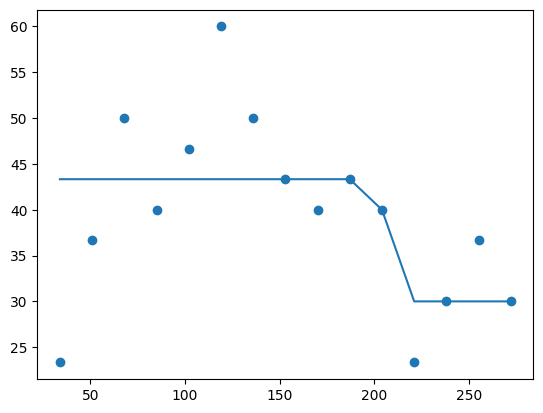

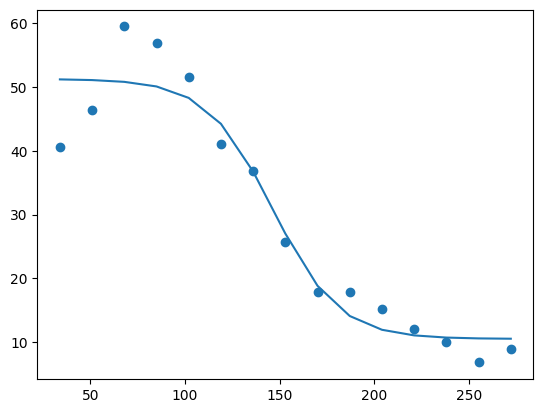

In [408]:
# Generate the fitted parameters per group
illusions_count_sigmoid = []
groups = ["Control", "HA"]
a_sigmoid= []
b_sigmoid= []
twi_sigmoid = []
slope_sigmoid = [] 

for group in groups:
    group_data = df_sigmoid_both[df_sigmoid_both.Group == group].sort_values("SOA")
    illussion_count = group_data["Total_i_count"].tolist()[0]
    group_twi = np.nan

    if illussion_count > 0: # Only run if there was at least one occurence of the illusion
        group_data_illusion = group_data.Illusion_count.values * 10
        soas = group_data.SOA.values * 17

        # Main fitting procedure
        a, b, group_twi, group_slope = sigfit(soas, group_data_illusion)
        group_sigmoid_data = sig(soas, a, b, group_twi, group_slope)

        # Sanity check plotting -> worked perfectly
        plt.scatter(soas, group_data_illusion)
        plt.plot(soas, group_sigmoid_data)
        plt.show()

        #x = np.linspace(soas[0], soas[-1], 100)
        #y = sig(x, a, b, group_twi, group_slope)
        # Create a pandas DataFrame
        #df = pd.DataFrame({'x': x, 'y': y})

        # Plot the sigmoid function
        #plt.plot(df['x'], df['y'])
        #plt.title('Sigmoid Function')
        #plt.xlabel('x')
        #plt.ylabel('Sigmoid(x)')
        #plt.show()

    a_sigmoid.append(a)
    b_sigmoid.append(b)
    twi_sigmoid.append(group_twi)
    slope_sigmoid.append(group_slope)
    illusions_count_sigmoid.append(illussion_count)

In [409]:
# Create group parameters dataset
df_sigmoid_fitted = pd.DataFrame(list(zip(groups,a_sigmoid,b_sigmoid,
                                           twi_sigmoid, slope_sigmoid, illusions_count_sigmoid)),
               columns =['group', 'a', 'b','TWI','slope', "illusion_count"])
df_sigmoid_fitted.head(5)
df_sigmoid_fitted

,group,a,b,TWI,slope,illusion_count
0,Control,30.000000,13.333333,204.926529,-0.843362,59.333333
1,HA,10.534087,40.714440,146.310142,-17.409409,44.736842


In [410]:
df_sigmoid_fitted.to_pickle("data/df_group_sigmoid")